In [1]:
%matplotlib inline
import pandas as pd
import km3pipe.style.moritz
import matplotlib.pyplot as plt

Loading style definitions from '/home/moritz/pkg/km3pipe/km3pipe/kp-data/stylelib/moritz.mplstyle'


In [2]:
from km3flux.flux import DarkMatterFlux
DarkMatterFlux.channels

{'b', 'mu', 'tau', 'w'}

In [3]:
#prod_numu_fname = 'AtProductionNoEW_neutrinos_mu.dat'     # with the EW correction
prod_numu_fname = 'AtProduction_neutrinos_mu.dat'

nue_fname = 'GC_neutrinos_e.dat'
numu_fname = 'GC_neutrinos_mu.dat'
nutau_fname = 'GC_neutrinos_tau.dat'

In [4]:
prod = pd.read_table(prod_numu_fname, delim_whitespace=True)

nue = pd.read_table(nue_fname, delim_whitespace=True)
numu = pd.read_table(numu_fname, delim_whitespace=True)
nutau = pd.read_table(nutau_fname, delim_whitespace=True)

In [5]:
nue['flavor'] = 'nu_e'
numu['flavor'] = 'nu_mu'
nutau['flavor'] = 'nu_tau'
df = pd.concat([nue, numu, nutau])

In [6]:
all_cols = sorted(df.columns)
cols = ['mDM', 'Log[10,x]', 
        '\[Mu]', '\[Tau]', 'b', 'W',
        'flavor', 
        # 'energy'
       ]
alias = {
    'mDM': 'mass_dm',
    'Log[10,x]': 'log10_x',
    '\[Mu]': 'mu',
    '\[Tau]': 'tau',
    'W': 'w',
}

In [7]:
df = df[cols]
df.rename(columns=alias, inplace=True)
prod = prod[[c for c in cols if c != 'flavor']]
prod.rename(columns=alias, inplace=True)

In [8]:
df['energy'] = df['mass_dm'] * np.power(10, df['log10_x'])
prod['energy'] = prod['mass_dm'] * np.power(10, prod['log10_x'])

In [9]:
df.columns

Index(['mass_dm', 'log10_x', 'mu', 'tau', 'b', 'w', 'flavor', 'energy'], dtype='object')

In [10]:
prod.columns

Index(['mass_dm', 'log10_x', 'mu', 'tau', 'b', 'w', 'energy'], dtype='object')

In [11]:
tabs = {mass: tab
    for mass, tab in df.groupby('mass_dm')}

In [12]:
masses = sorted(list(tabs.keys()))
flavors = sorted(list(df.flavor.unique()))
print(masses[:5])
print(flavors)

[5, 6, 8, 10, 15]
['nu_e', 'nu_mu', 'nu_tau']


In [13]:
m3k = tabs[3000]
m3k = m3k[m3k.flavor == 'nu_mu']

p = prod[prod.mass_dm == 3000]

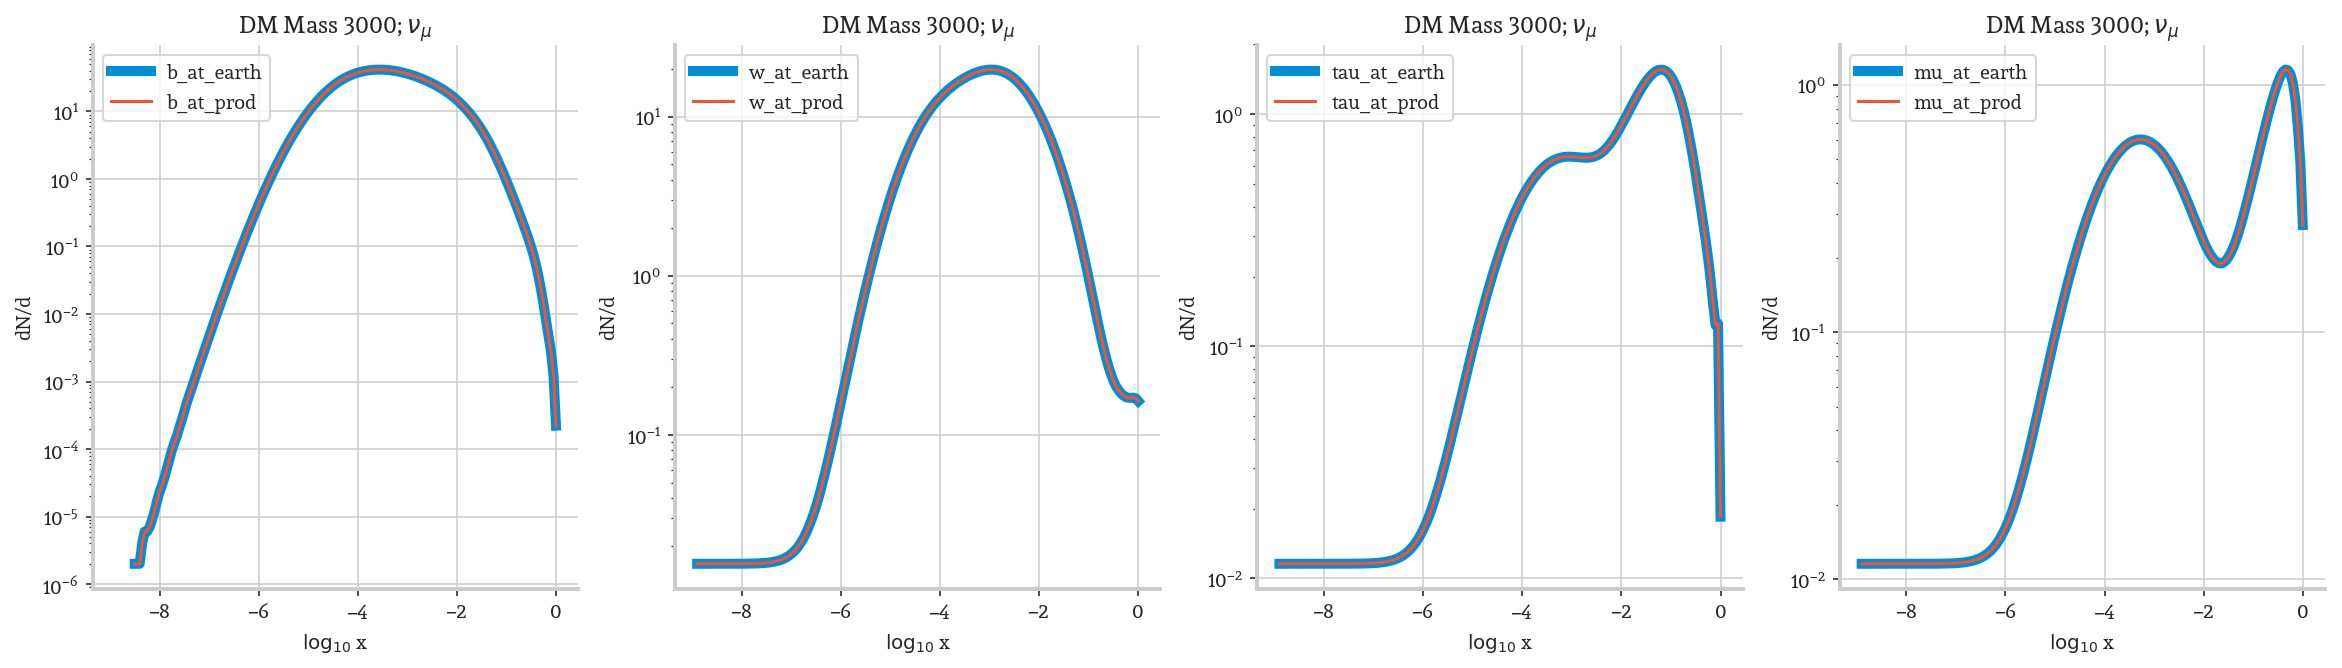

In [14]:
def plot_x():
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

    m3k.plot('log10_x', 'b', label='b_at_earth', ax=ax1, linewidth=5)
    p.plot('log10_x', 'b', label='b_at_prod', ax=ax1)
    ax1.legend()
    ax1.set_title(r'DM Mass 3000; $\nu_\mu$')
    ax1.set_xlabel(r'$\log_{10}$ x')
    ax1.set_ylabel('dN/d')
    ax1.set_yscale('log');

    ax = m3k.plot('log10_x', 'w', label='w_at_earth', ax=ax2, linewidth=5)
    p.plot('log10_x', 'w', label='w_at_prod', ax=ax2)
    ax2.legend()
    ax2.set_title(r'DM Mass 3000; $\nu_\mu$')
    ax2.set_xlabel(r'$\log_{10}$ x')
    ax2.set_ylabel('dN/d')
    ax2.set_yscale('log');

    ax = m3k.plot('log10_x', 'tau', label='tau_at_earth', ax=ax3, linewidth=5)
    p.plot('log10_x', 'tau', label='tau_at_prod', ax=ax3)
    ax3.legend()
    ax3.set_title(r'DM Mass 3000; $\nu_\mu$')
    ax3.set_xlabel(r'$\log_{10}$ x')
    ax3.set_ylabel('dN/d')
    ax3.set_yscale('log');

    ax = m3k.plot('log10_x', 'mu', label='mu_at_earth', ax=ax4, linewidth=5)
    p.plot('log10_x', 'mu', label='mu_at_prod', ax=ax4)
    ax4.legend()
    ax4.set_title(r'DM Mass 3000; $\nu_\mu$')
    ax4.set_xlabel(r'$\log_{10}$ x')
    ax4.set_ylabel('dN/d')
    ax4.set_yscale('log');
    
plot_x()

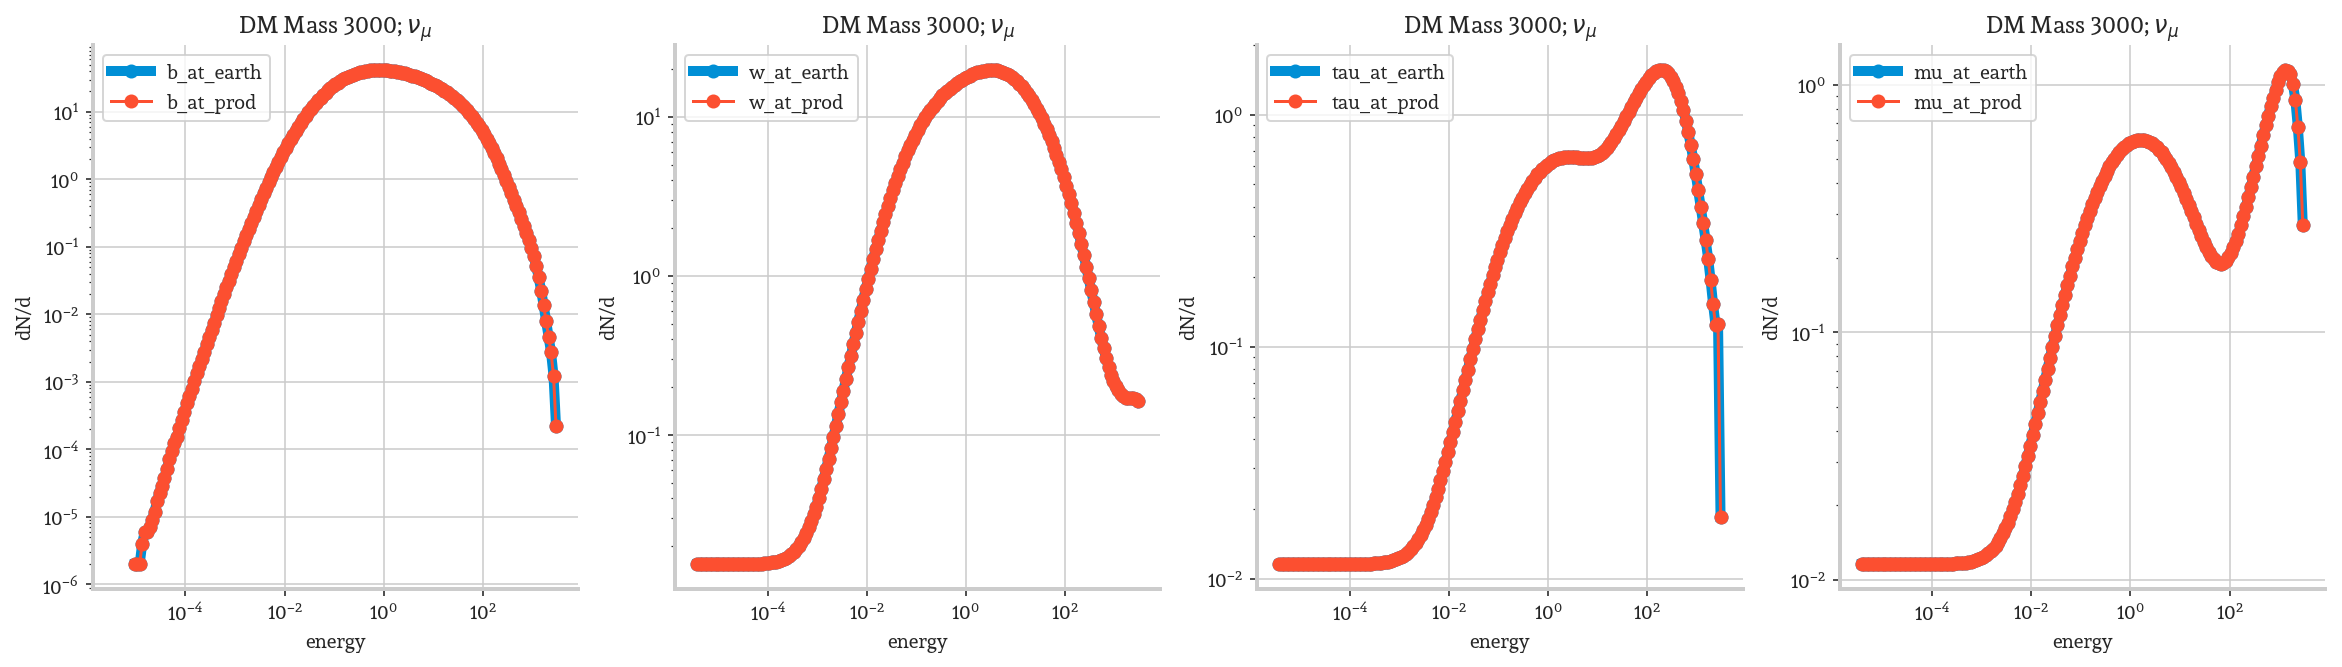

In [25]:
def plot_energy():
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

    m3k.plot('energy', 'b', label='b_at_earth', ax=ax1, linewidth=5, marker='o')
    p.plot('energy', 'b', label='b_at_prod', ax=ax1, marker='o')
    ax1.legend()
    ax1.set_title(r'DM Mass 3000; $\nu_\mu$')
    ax1.set_xlabel('energy')
    ax1.set_ylabel('dN/d')
    ax1.set_xscale('log');
    ax1.set_yscale('log');

    ax = m3k.plot('energy', 'w', label='w_at_earth', ax=ax2, linewidth=5, marker='o')
    p.plot('energy', 'w', label='w_at_prod', ax=ax2, marker='o')
    ax2.legend()
    ax2.set_title(r'DM Mass 3000; $\nu_\mu$')
    ax2.set_xlabel('energy')
    ax2.set_ylabel('dN/d')
    ax2.set_xscale('log');
    ax2.set_yscale('log');

    ax = m3k.plot('energy', 'tau', label='tau_at_earth', ax=ax3, linewidth=5, marker='o')
    p.plot('energy', 'tau', label='tau_at_prod', ax=ax3, marker='o')
    ax3.legend()
    ax3.set_title(r'DM Mass 3000; $\nu_\mu$')
    ax3.set_xlabel('energy')
    ax3.set_ylabel('dN/d')
    ax3.set_xscale('log');
    ax3.set_yscale('log');

    ax = m3k.plot('energy', 'mu', label='mu_at_earth', ax=ax4, linewidth=5, marker='o')
    p.plot('energy', 'mu', label='mu_at_prod', ax=ax4, marker='o')
    ax4.legend()
    ax4.set_title(r'DM Mass 3000; $\nu_\mu$')
    ax4.set_xlabel('energy')
    ax4.set_ylabel('dN/d')
    ax4.set_xscale('log');
    ax4.set_yscale('log');
    
plot_energy()

In [16]:
def df_with_strings_to_records(df):
    dtypes = [df[c].dtype.name for c in df.columns]
    d = {c: df[c].values for c in df.columns}
    d['flavor'] = np.array(d['flavor'].astype('|S'))
    names = []
    values = []
    for i, (k, v) in enumerate(d.items()):
        if dtypes[i] == 'object':
            v = np.array(v.astype('|S'))
        names.append(k)
        values.append(v)
    names = ','.join(names)
    arr = np.core.records.fromarrays(values, names=names)
    return arr

In [17]:
arr = df_with_strings_to_records(df)

In [18]:
%ls
%pwd

 AtProduction_neutrinos_mu.dat       GC_neutrinos_mu.dat
 AtProductionNoEW_neutrinos_mu.dat   GC_neutrinos_tau.dat
 GC_neutrinos_e.dat                 'parse cirelli tables.ipynb'


'/home/moritz/pkg/km3flux/km3flux/data/read_cirelli'

In [19]:
from km3pipe.io.pandas import df_to_h5, write_table
write_table(arr, 'cirelli_gc.h5', '/data')

In [20]:
#%%bash
#ptrepack foo.h5:/bla/table cirelli_gc.h5:/data --complevel=5 --fletcher32=1 --shuffle=1 --overwrite-nodes
#rm foo.h5
#ptdump cirelli_gc.h5

In [21]:
pwd

'/home/moritz/pkg/km3flux/km3flux/data/read_cirelli'

In [22]:
pd.read_hdf('cirelli_gc.h5')

,mass_dm,log10_x,mu,tau,b,w,flavor,energy
0,5,-8.90,0.000000,0.000000,0.000000,0.000000,nu_e,6.294627e-09
1,5,-8.85,0.000000,0.000000,0.000000,0.000000,nu_e,7.062688e-09
2,5,-8.80,0.000000,0.000000,0.000000,0.000000,nu_e,7.924466e-09
3,5,-8.75,0.000000,0.000000,0.000000,0.000000,nu_e,8.891397e-09
4,5,-8.70,0.000000,0.000000,0.000000,0.000000,nu_e,9.976312e-09
5,5,-8.65,0.000000,0.000000,0.000000,0.000000,nu_e,1.119361e-08
6,5,-8.60,0.000000,0.000000,0.000000,0.000000,nu_e,1.255943e-08
7,5,-8.55,0.000000,0.000000,0.000000,0.000000,nu_e,1.409191e-08
8,5,-8.50,0.000000,0.000000,0.000000,0.000000,nu_e,1.581139e-08
9,5,-8.45,0.000000,0.000000,0.000000,0.000000,nu_e,1.774067e-08
